In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/movie_ratings.csv')

In [28]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212595 entries, 0 to 212594
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      212595 non-null  int64  
 1   movie_id     212595 non-null  int64  
 2   rating       212595 non-null  int64  
 3   timestamp    212595 non-null  object 
 4   age          212595 non-null  int64  
 5   gender       212595 non-null  object 
 6   occupation   212595 non-null  object 
 7   zip_code     212595 non-null  object 
 8   title        212595 non-null  object 
 9   year         212559 non-null  float64
 10  decade       212559 non-null  float64
 11  genres       212595 non-null  object 
 12  rating_year  212595 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 21.1+ MB
None
             user_id       movie_id         rating            age  \
count  212595.000000  212595.000000  212595.000000  212595.000000   
mean      464.525643     390.545173   

In [29]:
genre_list = df['genres'].unique()

genre_list


array(['Comedy', 'Crime', 'Film-Noir', 'Mystery', 'Thriller', 'Children',
       'Drama', 'Romance', 'War', 'Western', 'Sci-Fi', 'Action',
       'Adventure', 'Musical', 'Documentary', 'Animation', 'Horror',
       'Fantasy', 'unknown'], dtype=object)

# 1. What's the breakdown of genres for the movies that were rated?
 
#### The unique genres types are 'Comedy', 'Crime', 'Film-Noir', 'Mystery', 'Thriller', 'Children','Drama', 'Romance', 'War', 'Western', 'Sci-Fi', 'Action', 'Adventure', 'Musical', 'Documentary', 'Animation', 'Horror', 'Fantasy', 'unknown'


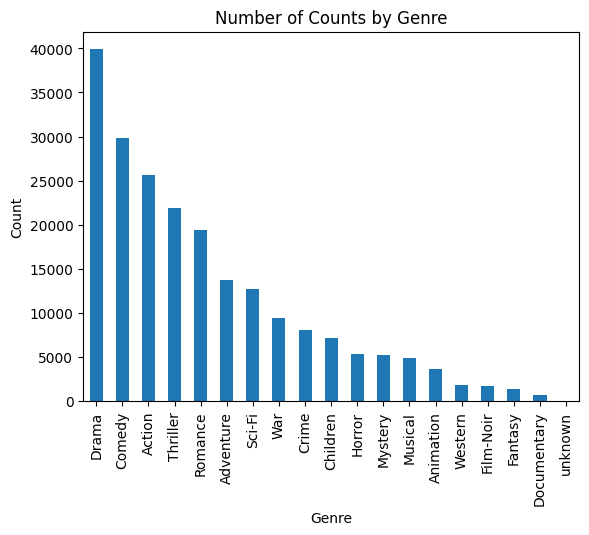

In [30]:
genre_counts = df['genres'].value_counts()

genre_counts.plot(kind='bar')

plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Number of Counts by Genre")
plt.show()

In [31]:
avg = df.groupby("genres")['rating'].mean()

avg



genres
Action         3.480245
Adventure      3.503527
Animation      3.576699
Children       3.353244
Comedy         3.394073
Crime          3.632278
Documentary    3.672823
Drama          3.687379
Fantasy        3.215237
Film-Noir      3.921523
Horror         3.290389
Musical        3.521397
Mystery        3.638132
Romance        3.621705
Sci-Fi         3.560723
Thriller       3.509007
War            3.815812
Western        3.613269
unknown        3.200000
Name: rating, dtype: float64

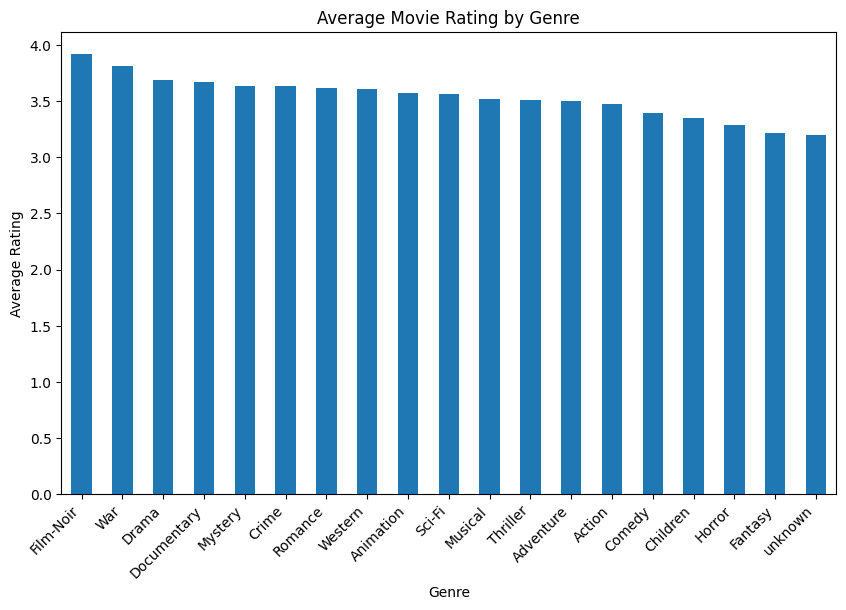

In [ ]:
avg = df.groupby("genres")["rating"].mean().sort_values(ascending=False)

# Create barplot
plt.figure(figsize=(10,6))
avg.plot(kind="bar")

plt.title("Average Movie Rating by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.show()

# 2. Which genres have the highest viewer satisfaction (highest ratings)? 
#### The highest ratings based on genre is action. 

In [32]:
avg = df.groupby("year")['rating'].mean()

avg

year
1922.0    3.555556
1926.0    3.000000
1930.0    3.777778
1931.0    4.000000
1932.0    3.833333
            ...   
1994.0    3.426577
1995.0    3.443458
1996.0    3.312172
1997.0    3.325326
1998.0    3.323529
Name: rating, Length: 71, dtype: float64

3. How does mean rating change across movie release years?


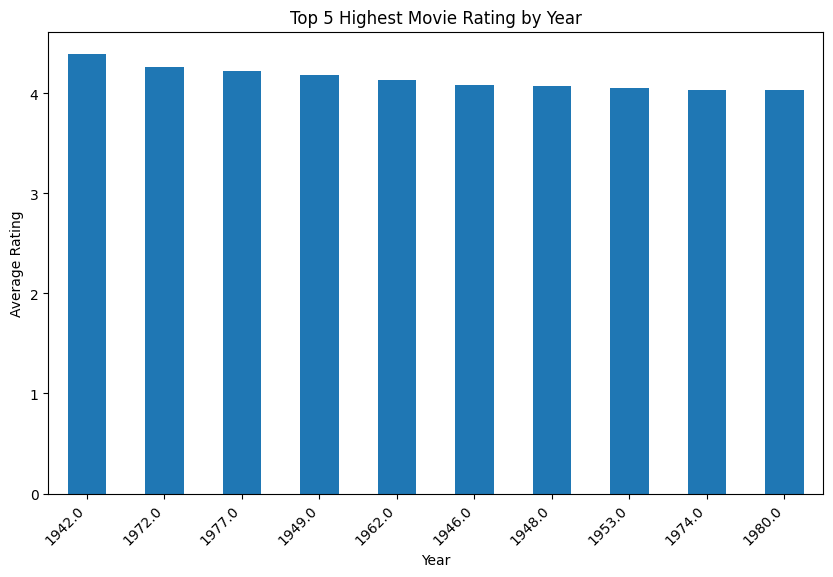

In [44]:
avg = df.groupby("year")["rating"].mean().sort_values(ascending=False).head(10)

# Create barplot
plt.figure(figsize=(10,6))
avg.plot(kind="bar")

plt.title("Top 5 Highest Movie Rating by Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.show()

In [33]:

movie_stats = df.groupby("title")["rating"].agg(["mean", "count"])


top50 = movie_stats[movie_stats["count"] >= 50] \
        .sort_values("mean", ascending=False) \
        .head(5)

top50



,mean,count
title,,
"Close Shave, A (1995)",4.491071,336
Schindler's List (1993),4.466443,596
"Wrong Trousers, The (1993)",4.466102,236
Casablanca (1942),4.456790,729
Wallace & Gromit: The Best of Aardman Animation (1996),4.447761,67


In [ ]:
top150 = movie_stats[movie_stats["count"] >= 150].sort_values("mean", ascending=False).head(5)

top150

,mean,count
title,,
"Close Shave, A (1995)",4.491071,336
Schindler's List (1993),4.466443,596
"Wrong Trousers, The (1993)",4.466102,236
Casablanca (1942),4.456790,729
"Shawshank Redemption, The (1994)",4.445230,283


# 4. What are the 5 best-rated movies that have at least 50 ratings? At least 150 ratings?

#### At least 50 ratings - Close Shave, A (1995), Schindler's List (1993), Wrong Trousers, The (1993), Casablanca (1942) and Wallace & Gromit: The Best of Aardman Animation (1996). 

#### At least 150 ratings - Close Shave, A (1995), Schindler's List (1993), Wrong Trousers, The (1993), Casablanca (1942) and Wallace & Gromit: Shawshank Redemption, The (1994). 